In [107]:
#importing the dataset...
import numpy as np
import pandas as pd
house_data=pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [108]:
#Data_Preprocessing start...

In [109]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [110]:
# no missing data...Data_Preprocessing Ended...

In [111]:
#Data_Visualization Start...
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

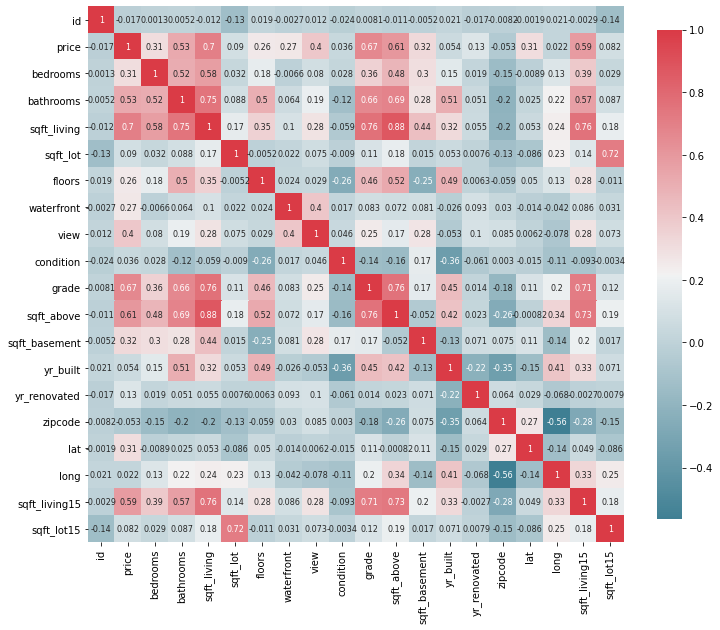

In [113]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 8 }

        )
plot_correlation_map(house_data)

In [114]:
def corrX_orig(df, cut = 0.9) :
        
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    drop = list()

        
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
		# Else: drop(row)
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(df.columns[[item for item in drop_set]])
    
    return(dropcols_names)
drop = corrX_orig(house_data, cut = 0.6)
print(drop)

['sqft_living15', 'condition', 'grade', 'bathrooms']


<ipython-input-114-b3be7f1bb496>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))


In [115]:
# based on features correlation, we can drop ['sqft_living15', 'condition', 'grade', 'bathrooms'] from our dataframe...

In [116]:
house_data=house_data.drop(['sqft_living15', 'condition', 'grade', 'bathrooms'], axis=1)
house_data

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1180,5650,1.0,0,0,1180,0,1955,0,98178,47.5112,-122.257,5650
1,6414100192,20141209T000000,538000.0,3,2570,7242,2.0,0,0,2170,400,1951,1991,98125,47.7210,-122.319,7639
2,5631500400,20150225T000000,180000.0,2,770,10000,1.0,0,0,770,0,1933,0,98028,47.7379,-122.233,8062
3,2487200875,20141209T000000,604000.0,4,1960,5000,1.0,0,0,1050,910,1965,0,98136,47.5208,-122.393,5000
4,1954400510,20150218T000000,510000.0,3,1680,8080,1.0,0,0,1680,0,1987,0,98074,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,1530,1131,3.0,0,0,1530,0,2009,0,98103,47.6993,-122.346,1509
21609,6600060120,20150223T000000,400000.0,4,2310,5813,2.0,0,0,2310,0,2014,0,98146,47.5107,-122.362,7200
21610,1523300141,20140623T000000,402101.0,2,1020,1350,2.0,0,0,1020,0,2009,0,98144,47.5944,-122.299,2007
21611,291310100,20150116T000000,400000.0,3,1600,2388,2.0,0,0,1600,0,2004,0,98027,47.5345,-122.069,1287


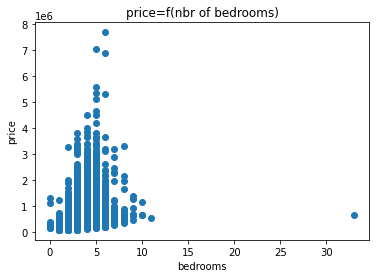

In [117]:
plt.scatter(house_data['bedrooms'],house_data['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('price=f(nbr of bedrooms)')
plt.show()

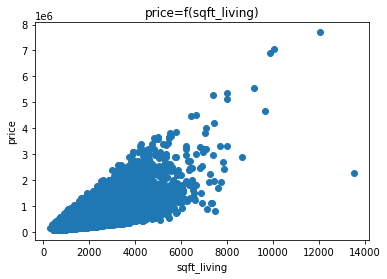

In [118]:
plt.scatter(house_data['sqft_living'],house_data['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('price=f(sqft_living)')
plt.show()

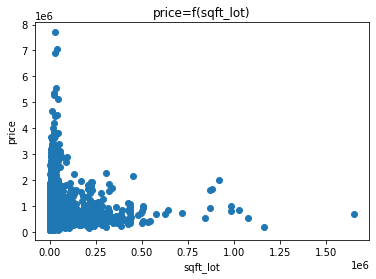

In [119]:
plt.scatter(house_data['sqft_lot'],house_data['price'])
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('price=f(sqft_lot)')
plt.show()

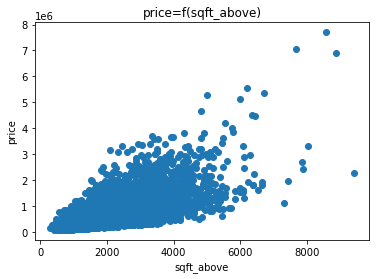

In [120]:
plt.scatter(house_data['sqft_above'],house_data['price'])
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('price=f(sqft_above)')
plt.show()

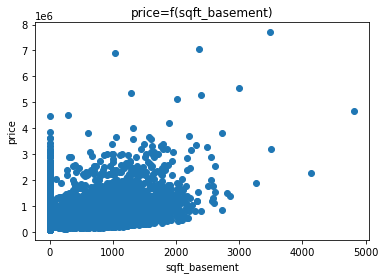

In [121]:
plt.scatter(house_data['sqft_basement'],house_data['price'])
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('price=f(sqft_basement)')
plt.show()

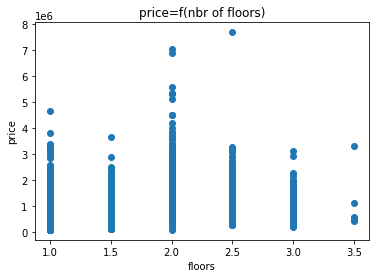

In [122]:
plt.scatter(house_data['floors'],house_data['price'])
plt.xlabel('floors')
plt.ylabel('price')
plt.title('price=f(nbr of floors)')
plt.show()

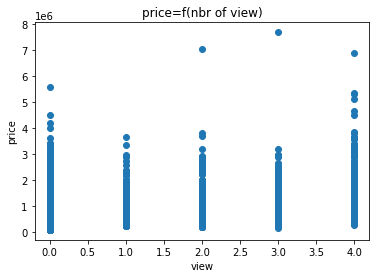

In [123]:
plt.scatter(house_data['view'],house_data['price'])
plt.xlabel('view')
plt.ylabel('price')
plt.title('price=f(nbr of view)')
plt.show()

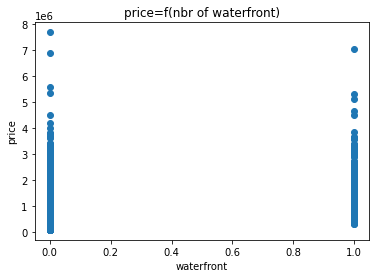

In [124]:
plt.scatter(house_data['waterfront'],house_data['price'])
plt.xlabel('waterfront')
plt.ylabel('price')
plt.title('price=f(nbr of waterfront)')
plt.show()

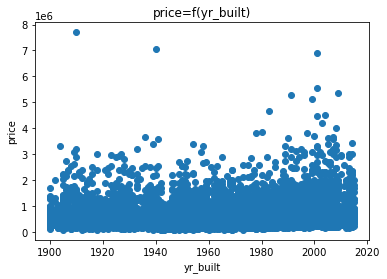

In [125]:
plt.scatter(house_data['yr_built'],house_data['price'])
plt.xlabel('yr_built')
plt.ylabel('price')
plt.title('price=f(yr_built)')
plt.show()

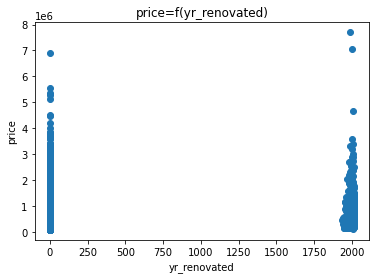

In [126]:
plt.scatter(house_data['yr_renovated'],house_data['price'])
plt.xlabel('yr_renovated')
plt.ylabel('price')
plt.title('price=f(yr_renovated)')
plt.show()

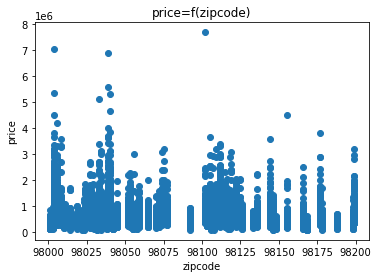

In [127]:
plt.scatter(house_data['zipcode'],house_data['price'])
plt.xlabel('zipcode')
plt.ylabel('price')
plt.title('price=f(zipcode)')
plt.show()

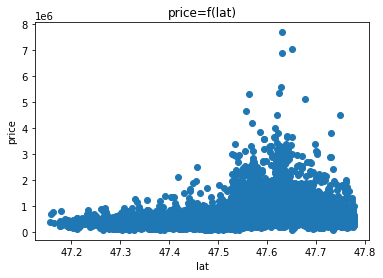

In [128]:
plt.scatter(house_data['lat'],house_data['price'])
plt.xlabel('lat')
plt.ylabel('price')
plt.title('price=f(lat)')
plt.show()

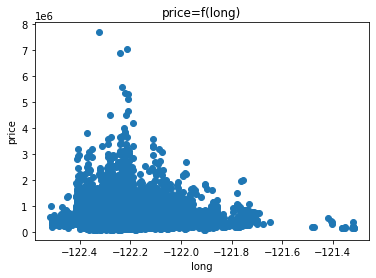

In [129]:
plt.scatter(house_data['long'],house_data['price'])
plt.xlabel('long')
plt.ylabel('price')
plt.title('price=f(long)')
plt.show()

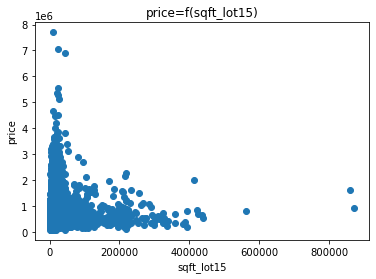

In [130]:
plt.scatter(house_data['sqft_lot15'],house_data['price'])
plt.xlabel('sqft_lot15')
plt.ylabel('price')
plt.title('price=f(sqft_lot15)')
plt.show()

In [131]:
# sqft_living, sqft_above are the most important features for this model.
# the variation of each of this features present a remarqable variation in the price of the house's price.

In [132]:
# Data_Visualization Ended...

In [133]:
#linear_Regression...

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

MSE 62451720102.954
R squared 0.5035535751151091


Text(0, 0.5, 'price')

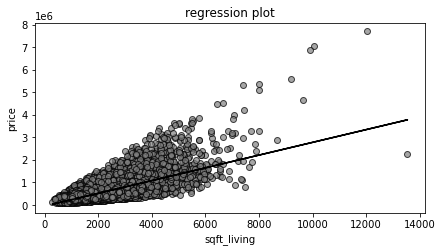

In [135]:
x=house_data['sqft_living'].values[:,np.newaxis]
y=house_data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

fig, ax = plt.subplots(figsize=(7, 3.5))
ax.plot(x,model.predict(x), color='k', label='Regression model')
ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
plt.title('regression plot')
plt.xlabel('sqft_living')
plt.ylabel('price')

MSE 78645081812.31802
R squared 0.37482795291881355


Text(0, 0.5, 'price')

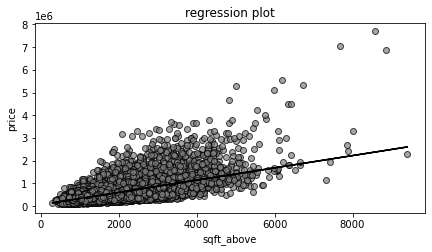

In [136]:
x=house_data['sqft_above'].values[:,np.newaxis]
y=house_data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

fig, ax = plt.subplots(figsize=(7, 3.5))
ax.plot(x,model.predict(x), color='k', label='Regression model')
ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
plt.title('regression plot')
plt.xlabel('sqft_above')
plt.ylabel('price')

In [137]:
#linear_regression ended...

In [138]:
#multi_linear_regression...

In [139]:
x=house_data[["sqft_living",'sqft_above']] 
y=house_data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62366953892.48519
R squared 0.5042274057488997


In [140]:
# multi linear regression model present a better prediction than the linear regression model, 
# R²(multi linear regression)>R²(linear regression)

In [141]:
#poly_regression...

In [142]:
x=house_data[["sqft_living",'sqft_above']]
y=house_data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57776047970.74595
R squared:  0.5407218182018005


In [143]:
# polynomial regression model present a better prediction than the multi linear regression model, 
# R²(polynomial regression)>R²(multi linear regression)

MSE:  58754285737.84791
R squared:  0.5329455289120172


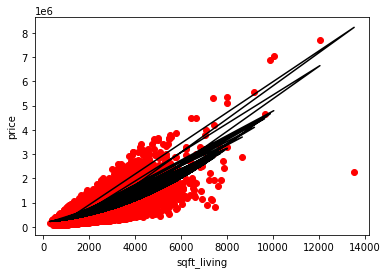

In [144]:
x=house_data["sqft_living"].values.reshape(-1,1)
y=house_data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

plt.scatter(x, y, color="r")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
plt.show()

MSE:  77003632371.86795
R squared:  0.3878762997857592


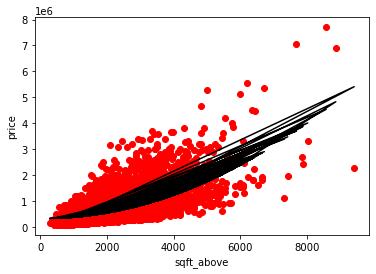

In [145]:
x=house_data["sqft_above"].values.reshape(-1,1)
y=house_data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

plt.scatter(x, y, color="r")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
plt.show()

In [146]:
# polynomial regression model present a better prediction than the multi linear regression model, 
# R²(polynomial regression)>R²(linear regression)